import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [12]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/57

make measure image

In [8]:
def_img = io.imread("image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 4\\2-21-07 PM\\11.26.2020 (4) 0505.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

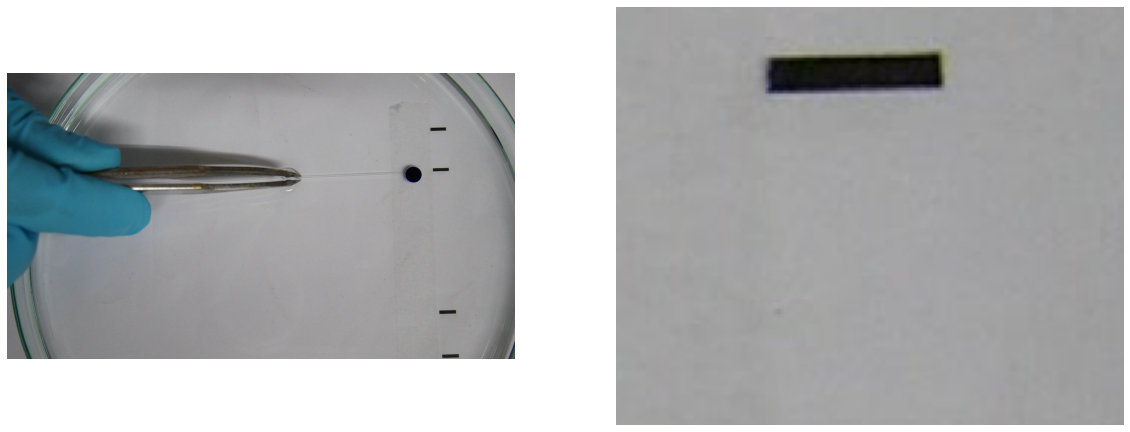

In [9]:
measure_im = crop(def_img, ((190, 750), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

In [10]:
# plot_histogram(measure_im)

[23, 51]
[22, 108]


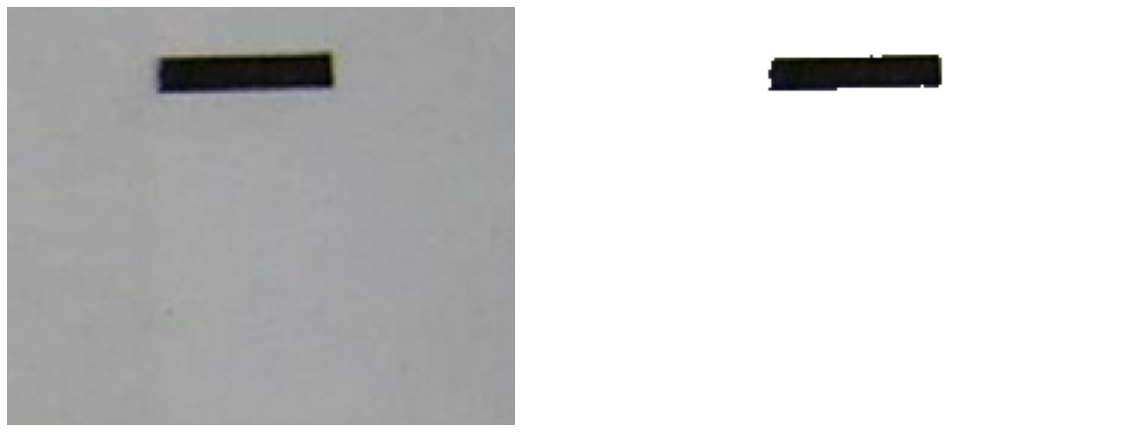

length of picture is  57.0087712549569 pixel


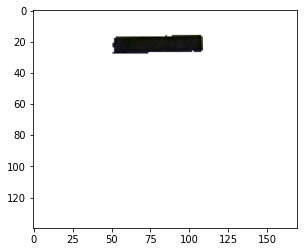

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

57 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 57


find definition length first picture

(1080, 1920, 3) (210, 450, 3)


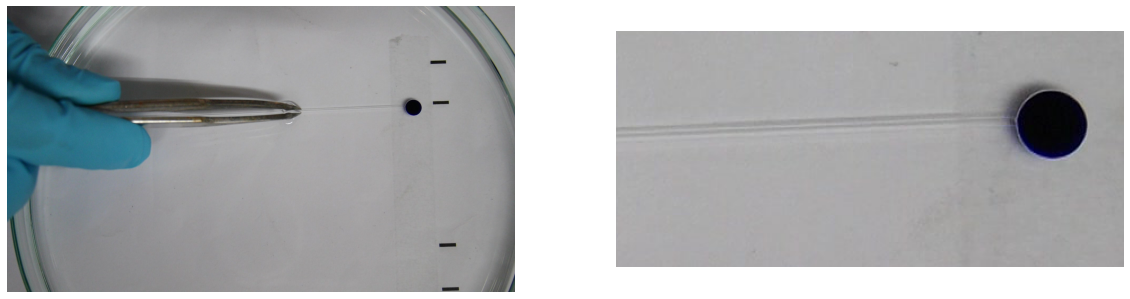

In [18]:
def_crop_im = crop(def_img, ((300, 570), (1150, 320), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

In [19]:
# plot_histogram(def_crop_im)

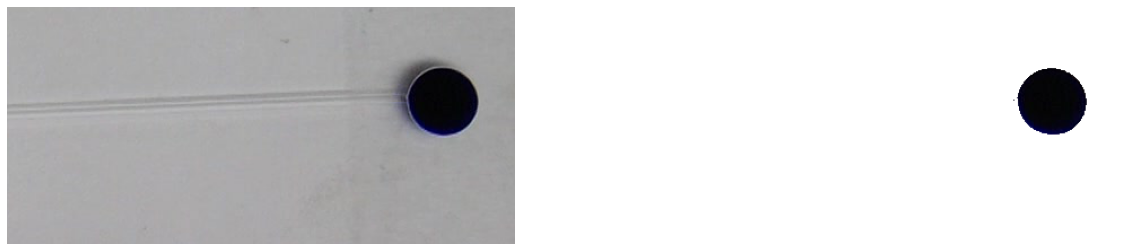

In [20]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[82, 352]
[84, 416]
ldef  64.03124237432849 pixel


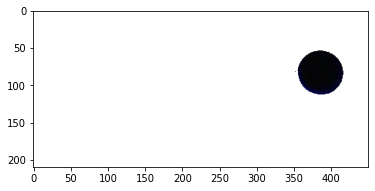

In [21]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 505 to 573

In [22]:
number_of_picture = 505
thresh = 45
template1 = []
l_def = 64.03124237432849
for i in range(573-505+1):
    if(True) :   
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 4\\2-21-07 PM\\11.26.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((300, 570), (1150, 320), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [23]:
print(template1)
print(len(template1))

[0, 1, 3, 7, 12, 16, 21, 28, 33, 39, 44, 50, 56, 62, 67, 73, 78, 85, 89, 94, 101, 107, 111, 116, 121, 127, 133, 137, 142, 148, 153, 158, 164, 169, 174, 180, 184, 189, 194, 199, 205, 209, 213, 219, 224, 230, 234, 240, 244, 249, 254, 258, 264, 268, 273, 277, 282, 287, 291, 296, 300, 306, 310, 314, 319, 324, 329, 333, 338]
69


find length on crop value 2 from 574 to 1392

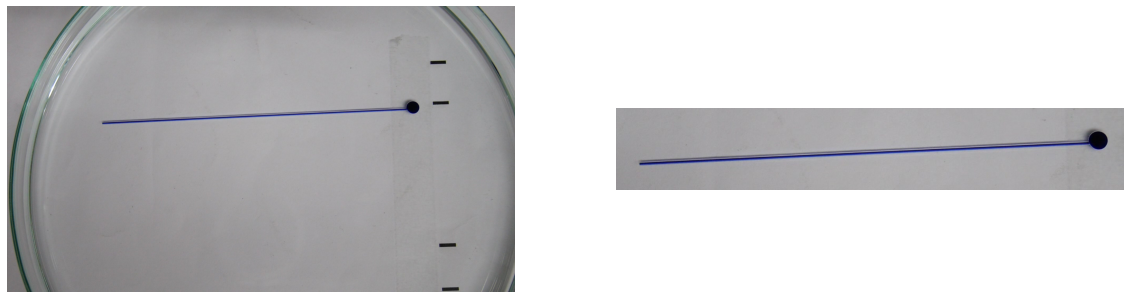

In [27]:
image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 4\\2-21-07 PM\\11.26.2020 (4) " + str(1392).zfill(4) + ".jpg" )
crop_image = crop(image, ((300, 570), (300, 320), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [30]:
number_of_picture = 574
thresh = 45
template2 = []
l_def = 64.03124237432849
for i in range(1392-574+1):
    if( True) :
        image = mpimg.imread( "image\\11.26.2020 Heptane-0.06mM Triton x-100\\frame 4\\2-21-07 PM\\11.26.2020 (4) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((300, 570), (300, 320), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [31]:
print(template2)
print(len(template2))

[342, 347, 351, 356, 360, 365, 369, 374, 378, 382, 386, 391, 395, 400, 404, 407, 412, 417, 420, 425, 430, 433, 438, 442, 446, 451, 454, 459, 463, 467, 471, 475, 479, 483, 488, 492, 496, 500, 503, 508, 512, 516, 519, 524, 528, 532, 535, 539, 543, 548, 552, 555, 559, 563, 567, 571, 575, 579, 582, 587, 590, 594, 598, 601, 605, 610, 613, 617, 620, 623, 628, 632, 635, 637, 642, 645, 650, 653, 656, 661, 664, 668, 672, 676, 679, 684, 686, 690, 694, 697, 701, 704, 707, 711, 715, 718, 722, 726, 730, 733, 737, 741, 744, 748, 751, 755, 759, 763, 767, 771, 773, 777, 781, 785, 788, 792, 795, 799, 804, 805, 809, 812, 816, 820, 823, 826, 829, 832, 836, 839, 842, 846, 849, 852, 855, 859, 862, 866, 869, 872, 875, 878, 880, 884, 887, 890, 893, 895, 899, 902, 905, 907, 910, 913, 916, 918, 921, 923, 927, 929, 931, 934, 937, 939, 942, 944, 947, 949, 952, 954, 956, 959, 961, 963, 965, 968, 970, 972, 974, 976, 978, 980, 983, 984, 986, 989, 990, 992, 994, 997, 999, 1000, 1002, 1004, 1007, 1008, 1010, 1012, 10

concat 2 template and calculate pixel to centimeter

In [32]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [33]:
print(l_array)

[0.0000000e+00 8.7719299e-03 2.6315790e-02 6.1403509e-02 1.0526316e-01
 1.4035088e-01 1.8421052e-01 2.4561404e-01 2.8947368e-01 3.4210527e-01
 3.8596490e-01 4.3859649e-01 4.9122807e-01 5.4385966e-01 5.8771932e-01
 6.4035088e-01 6.8421054e-01 7.4561405e-01 7.8070176e-01 8.2456142e-01
 8.8596493e-01 9.3859649e-01 9.7368419e-01 1.0175439e+00 1.0614035e+00
 1.1140351e+00 1.1666666e+00 1.2017543e+00 1.2456141e+00 1.2982457e+00
 1.3421053e+00 1.3859649e+00 1.4385965e+00 1.4824561e+00 1.5263158e+00
 1.5789474e+00 1.6140351e+00 1.6578947e+00 1.7017543e+00 1.7456141e+00
 1.7982457e+00 1.8333334e+00 1.8684211e+00 1.9210526e+00 1.9649123e+00
 2.0175438e+00 2.0526316e+00 2.1052632e+00 2.1403508e+00 2.1842105e+00
 2.2280703e+00 2.2631578e+00 2.3157895e+00 2.3508773e+00 2.3947368e+00
 2.4298246e+00 2.4736843e+00 2.5175438e+00 2.5526316e+00 2.5964913e+00
 2.6315789e+00 2.6842105e+00 2.7192984e+00 2.7543859e+00 2.7982457e+00
 2.8421052e+00 2.8859649e+00 2.9210527e+00 2.9649122e+00 3.0000000e+00
 3.043

export data to exel

In [34]:
import pandas as pd

In [35]:
print(len(l_array))

888


In [36]:
data = []
num_img = 505
for i in range(len(l_array)):
    data.append(( " 11.26.2020 (4) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.06(4)_11.26.2020_2-21-07-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


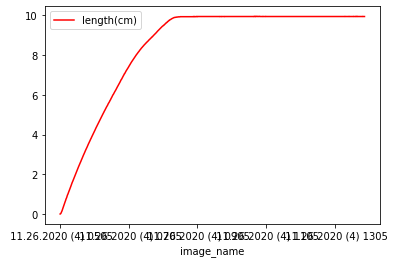

In [37]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()